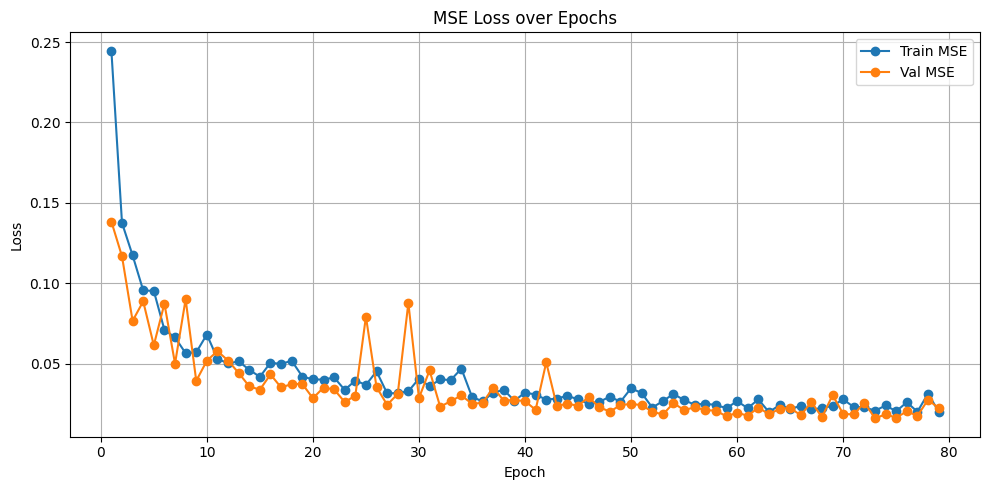

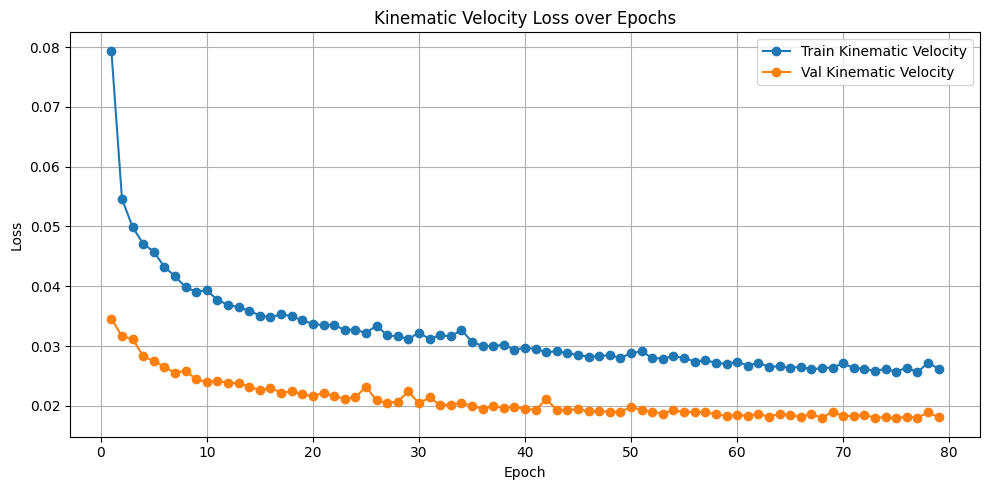

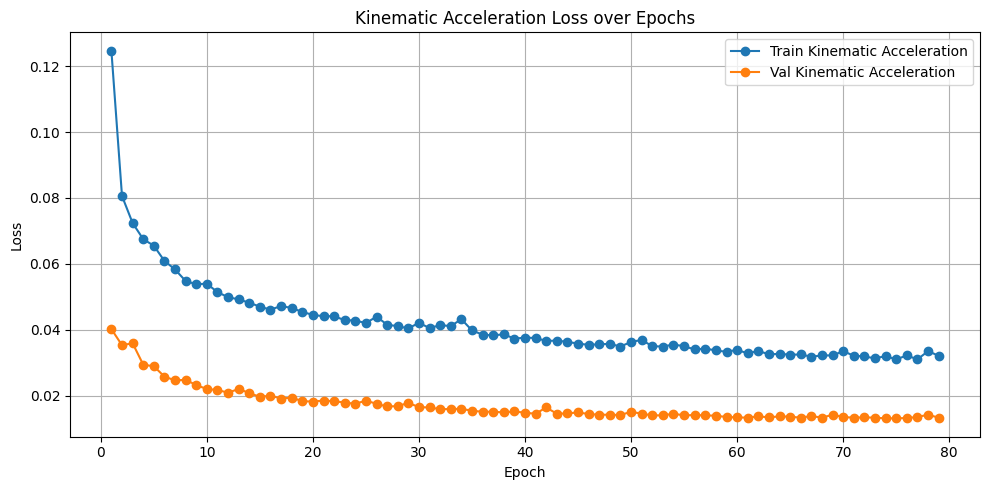

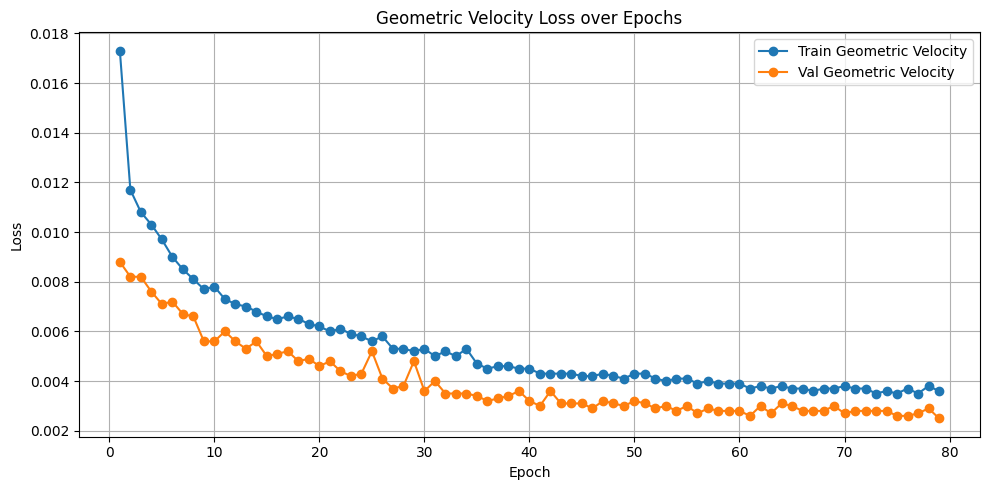

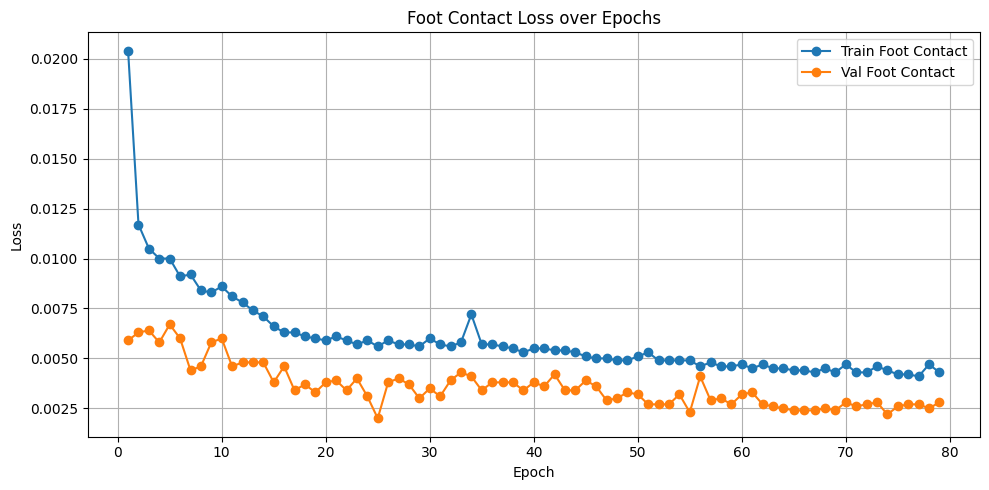

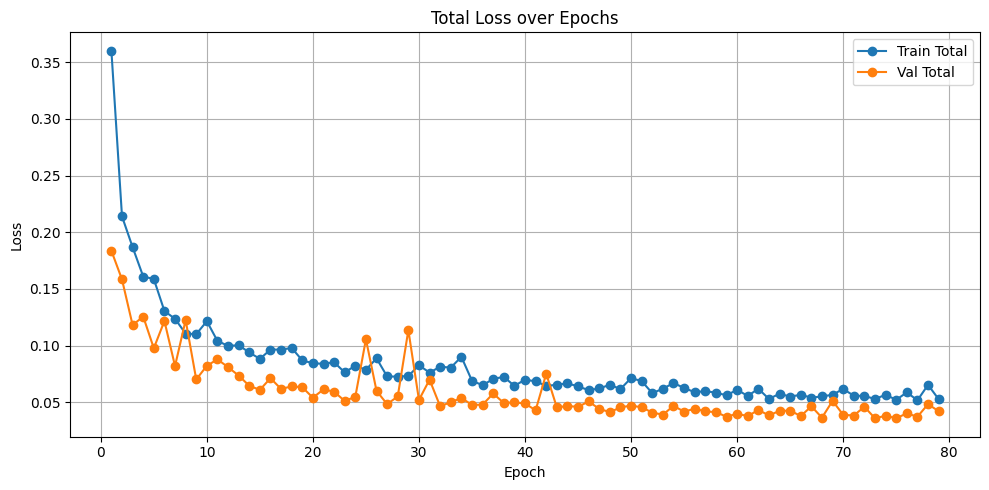

In [8]:
import re
import matplotlib.pyplot as plt

# === PATH ===
log_file = "../../../experiments_output/ArmatureMDM_Run_01/training_log_ArmatureMDM_Run_01.txt"

epochs = []
train_losses = {
    'mse': [],
    'kinematic_velocity': [],
    'kinematic_acceleration': [],
    'geometric_velocity': [],
    'geometric_foot_contact': [],
    'total': []
}
val_losses = {
    'mse': [],
    'kinematic_velocity': [],
    'kinematic_acceleration': [],
    'geometric_velocity': [],
    'geometric_foot_contact': [],
    'total': []
}

train_re = re.compile(
    r"Epoch (\d+).*?Training Summary: Avg main_loss/mse: ([\d.]+).*?kinematic/velocity_loss: ([\d.]+).*?kinematic/acceleration_loss: ([\d.]+).*?geometric/velocity_loss: ([\d.]+).*?geometric/foot_contact_loss: ([\d.]+).*?total_loss: ([\d.]+)"
)
val_re = re.compile(
    r"Epoch (\d+).*?Validation Summary: Avg main_loss/mse: ([\d.]+).*?kinematic/velocity_loss: ([\d.]+).*?kinematic/acceleration_loss: ([\d.]+).*?geometric/velocity_loss: ([\d.]+).*?geometric/foot_contact_loss: ([\d.]+).*?total_loss: ([\d.]+)"
)

# === PARSING ===
with open(log_file, 'r') as f:
    for line in f:
        train_match = train_re.search(line)
        if train_match:
            epoch = int(train_match.group(1))
            if epoch not in epochs:
                epochs.append(epoch)
            train_losses['mse'].append(float(train_match.group(2)))
            train_losses['kinematic_velocity'].append(float(train_match.group(3)))
            train_losses['kinematic_acceleration'].append(float(train_match.group(4)))
            train_losses['geometric_velocity'].append(float(train_match.group(5)))
            train_losses['geometric_foot_contact'].append(float(train_match.group(6)))
            train_losses['total'].append(float(train_match.group(7)))

        val_match = val_re.search(line)
        if val_match:
            val_losses['mse'].append(float(val_match.group(2)))
            val_losses['kinematic_velocity'].append(float(val_match.group(3)))
            val_losses['kinematic_acceleration'].append(float(val_match.group(4)))
            val_losses['geometric_velocity'].append(float(val_match.group(5)))
            val_losses['geometric_foot_contact'].append(float(val_match.group(6)))
            val_losses['total'].append(float(val_match.group(7)))

# === PLOT ===
def plot_loss(train, val, label, ylabel):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train, label=f'Train {label}', marker='o')
    plt.plot(epochs, val, label=f'Val {label}', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(f'{label} Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === PLOT ALL LOSSES ===
plot_loss(train_losses['mse'], val_losses['mse'], 'MSE', 'Loss')
plot_loss(train_losses['kinematic_velocity'], val_losses['kinematic_velocity'], 'Kinematic Velocity', 'Loss')
plot_loss(train_losses['kinematic_acceleration'], val_losses['kinematic_acceleration'], 'Kinematic Acceleration', 'Loss')
plot_loss(train_losses['geometric_velocity'], val_losses['geometric_velocity'], 'Geometric Velocity', 'Loss')
plot_loss(train_losses['geometric_foot_contact'], val_losses['geometric_foot_contact'], 'Foot Contact', 'Loss')
plot_loss(train_losses['total'], val_losses['total'], 'Total', 'Loss')